In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link1 =  '/Users/andreza/Documents/UFRPE/Projetos/Fiocruz/AESOP/Aesop_FF/aero_anac_2017_2023.parquet'

df = pd.read_parquet(link1, engine='pyarrow')

In [3]:
df.mes = df.mes.astype(int)

In [4]:
df.nat.unique()

array(['DOMÉSTICA', 'INTERNACIONAL'], dtype=object)

In [5]:
dta = df[df.nat == 'DOMÉSTICA']
dta.head()

,ano,mes,nat,nome_muni_ori,uf_ori,nome_muni_des,uf_des,co_muni_ori,co_muni_des,aero_pass,co_uf_ori,co_uf_des,aero_pass_week,aero_conec
0,2017,1,DOMÉSTICA,Alta Floresta,MT,Várzea Grande,MT,5100250,5108402,2850,51,51,712.50,28.50
1,2017,1,DOMÉSTICA,Altamira,PA,Belo Horizonte,MG,1500602,3106200,0,15,15,0.00,0.00
2,2017,1,DOMÉSTICA,Altamira,PA,Belém,PA,1500602,1501402,4785,15,15,1196.25,47.85
3,2017,1,DOMÉSTICA,Altamira,PA,Campinas,SP,1500602,3509502,0,15,15,0.00,0.00
4,2017,1,DOMÉSTICA,Altamira,PA,Itaituba,PA,1500602,1503606,36,15,15,9.00,0.36


In [6]:
data_chord = dta.rename(columns={"uf_ori":"source", "uf_des":"target", "aero_pass":"weight"})
data_chord.head()

,ano,mes,nat,nome_muni_ori,source,nome_muni_des,target,co_muni_ori,co_muni_des,weight,co_uf_ori,co_uf_des,aero_pass_week,aero_conec
0,2017,1,DOMÉSTICA,Alta Floresta,MT,Várzea Grande,MT,5100250,5108402,2850,51,51,712.50,28.50
1,2017,1,DOMÉSTICA,Altamira,PA,Belo Horizonte,MG,1500602,3106200,0,15,15,0.00,0.00
2,2017,1,DOMÉSTICA,Altamira,PA,Belém,PA,1500602,1501402,4785,15,15,1196.25,47.85
3,2017,1,DOMÉSTICA,Altamira,PA,Campinas,SP,1500602,3509502,0,15,15,0.00,0.00
4,2017,1,DOMÉSTICA,Altamira,PA,Itaituba,PA,1500602,1503606,36,15,15,9.00,0.36


In [7]:
data_chord[(data_chord.source == 'AM') & (data_chord.target == 'CE')].weight.mean()

8555.445945945947

In [8]:
data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

,target,source,weight
0,AC,AC,1237.035714
1,AC,AL,0.000000
2,AC,AM,1181.182927
3,AC,CE,527.500000
4,AC,DF,4417.315068
...,...,...,...
576,TO,PI,0.000000
577,TO,RJ,208.096774
578,TO,RS,7.000000
579,TO,SP,2663.835878


In [9]:
data_chord2 = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

data_chord2 = data_chord2[data_chord2['source'] != data_chord2['target']]

In [13]:
!pip install -U ipython


Requirement already up-to-date: ipython in /usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages (8.12.3)


In [14]:
#!pip install d3blocks

#Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Load example data
df1 = data_chord2

#data_chord[(data_chord.target != 'SP') & (data_chord.source != 'SP')]
#[data_chord.ano == '2019'][['source','target','weight']] 

# Plot
d3.chord(df1)

# Or specify the output path
d3.chord(df1, filepath='/Users/andreza/Downloads/Aesop_FF/chord_ufs.html')

ModuleNotFoundError: No module named 'd3blocks'

In [10]:
spatial_ses = dta.groupby(['ano', 'mes', 'uf_ori', 'uf_des'])['aero_pass'].sum().reset_index()

In [11]:
spatial_ses.uf_ori.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [12]:
busca = ['2022','2023']
selec_ano = spatial_ses[spatial_ses['ano'].isin(busca)]
ori = ['AM']
selec_uf = selec_ano[selec_ano['uf_ori'].isin(ori)]
des = ['CE']
selec_uf = selec_uf[selec_uf['uf_des'].isin(des)]
mes2022= ['7','8', '9','10','11','12']
mes2023= ['1','2', '3','4','5','6']

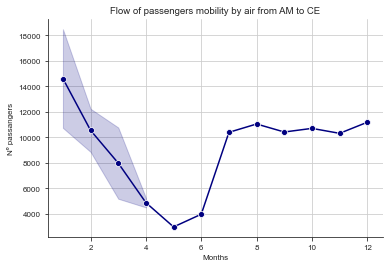

In [18]:
# sel_uf = 'AM'
# selec_uf = selec_ano[selec_ano.uf_ori == sel_uf]

# for uf in selec_uf.uf_des.unique():

    uf1 = 'AM'
    uf2 = 'CE'
 
    #Set the style and font sizes
    sns.set_style('ticks')
    plt.rcParams.update({'font.size': 8})

    dta_plot = selec_uf[selec_uf.uf_des == uf2]


    # Create a Seaborn line plot with different markers for each product
    sns.lineplot(x='mes', y='aero_pass', data=dta_plot, marker='o', color='navy')
    #sns.lineplot(x='Months', y='Product B', data=df, marker='s', color='teal', label='Product B')
    #sns.lineplot(x='Months', y='Product C', data=df, marker='D', color='salmon', label='Product C')
 
    # Set plot title and axes labels
    plt.title('Flow of passengers mobility by air from {}'.format(uf1) + ' to {}'.format(uf2))
    plt.xlabel('Months')
    plt.ylabel('Nº passangers')
 
    # Add a legend
    #plt.legend(loc='lower right')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

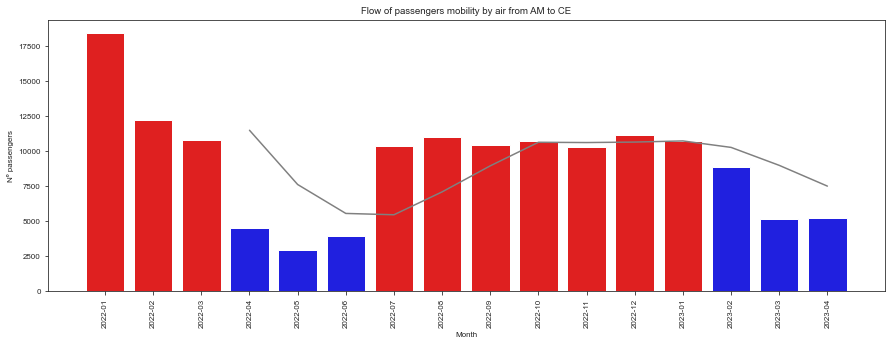

In [19]:
uf= 'AM'
for uf in selec_uf.uf_ori.unique():

    test = selec_uf[selec_uf.uf_ori == uf]
    test = test.rename(columns={'ano':'year', 'mes':'month'})
    test['date'] = pd.to_datetime(test[['year', 'month']].assign(DAY=1))
    test = test.assign(year_m = test['date'].apply("{:%Y-%m}".format))

    #values = np.array(test['aero_pass'])   
    #idx = np.array(test.year_m) 
    #clrs = ['blue' if (x < values.mean()) else 'red' for x in values ]
    
    pd_df = test.sort_values(['year_m']).reset_index(drop=True)
    clrs = ['blue' if (x < pd_df['aero_pass'].mean()) else 'red' for x in pd_df['aero_pass'] ]
    
    pd_df['rol'] = pd_df['aero_pass'].rolling(4).mean()

    fig = plt.figure(figsize =(15, 5))

    ax = sns.barplot(x='year_m', y='aero_pass', data=pd_df, order=pd_df['year_m'],palette = clrs)
    #sns.barplot(x=idx, y=values,rder=result['Id'], palette=clrs) # color=clrs)
    ax2 = sns.lineplot(x='year_m', y='rol', data=pd_df, ax=ax, color = 'grey')
    

    #plt.axhline(y = test.aero_pass.mean(), color = 'grey', label = 'axvline - full height')
    plt.xticks(rotation = 90); 
    
    ax.set_title("Flow of passengers mobility by air from AM to CE")
    ax.set(xlabel='Month', ylabel='Nº passengers');
    

# seasonal analysis

In [13]:
dta = df[df.nat == 'DOMÉSTICA']
dta.head()

,ano,mes,nat,nome_muni_ori,uf_ori,nome_muni_des,uf_des,co_muni_ori,co_muni_des,aero_pass,co_uf_ori,co_uf_des,aero_pass_week,aero_conec
0,2017,1,DOMÉSTICA,Alta Floresta,MT,Várzea Grande,MT,5100250,5108402,2850,51,51,712.50,28.50
1,2017,1,DOMÉSTICA,Altamira,PA,Belo Horizonte,MG,1500602,3106200,0,15,15,0.00,0.00
2,2017,1,DOMÉSTICA,Altamira,PA,Belém,PA,1500602,1501402,4785,15,15,1196.25,47.85
3,2017,1,DOMÉSTICA,Altamira,PA,Campinas,SP,1500602,3509502,0,15,15,0.00,0.00
4,2017,1,DOMÉSTICA,Altamira,PA,Itaituba,PA,1500602,1503606,36,15,15,9.00,0.36


In [14]:
seasonal_set = dta.groupby(['ano', 'mes', 'nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

In [15]:
ori = seasonal_set.nome_muni_ori.unique()

In [24]:
ori

array(['Alta Floresta', 'Altamira', 'Aracaju', 'Araguaína', 'Araxá',
       'Araçatuba', 'Arealva', 'Barcelos', 'Barra do Garças', 'Barreiras',
       'Belo Horizonte', 'Belém', 'Boa Vista', 'Bonito', 'Brasília',
       'Cabo Frio', 'Cacoal', 'Caldas Novas', 'Campina Grande',
       'Campinas', 'Campo Grande', 'Campos dos Goytacazes', 'Carauari',
       'Cascavel', 'Caxias do Sul', 'Chapecó', 'Coari', 'Corumbá',
       'Cruzeiro do Sul', 'Divinópolis', 'Dourados', 'Eirunepé',
       'Feira de Santana', 'Fernando de Noronha', 'Florianópolis',
       'Fortaleza', 'Foz do Iguaçu', 'Goianá', 'Goiânia',
       'Governador Valadares', 'Ilhéus', 'Imperatriz', 'Itaituba',
       'Jaguaruna', 'Ji-Paraná', 'Joinville', 'Juazeiro do Norte',
       'Lages', 'Lençóis', 'Londrina', 'Lábrea', 'Macapá', 'Manaus',
       'Marabá', 'Maringá', 'Marília', 'Montes Claros', 'Navegantes',
       'Oriximiná', 'Palmas', 'Parauapebas', 'Parnaíba', 'Passo Fundo',
       'Paulo Afonso', 'Pelotas', 'Petrolina', 'P

In [16]:
busca = ['2022','2023']
selec_ano = seasonal_set[seasonal_set['ano'].isin(busca)]
selec_muni = selec_ano[selec_ano['nome_muni_ori'].isin(ori)]
des = ['Salvador']
selec_muni = selec_muni[selec_muni['nome_muni_des'].isin(des)]
mes2022= ['7','8', '9','10','11','12']
mes2023= ['1','2', '3','4','5','6']

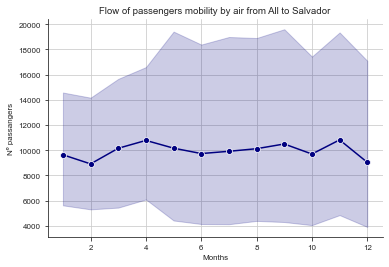

In [31]:
# sel_uf = 'AM'
# selec_uf = selec_ano[selec_ano.uf_ori == sel_uf]

# for muni in seasonal_set.nome_muni_ori.unique():

    muni1 = 'All'
    muni2 = 'Salvador'
 
    #Set the style and font sizes
    sns.set_style('ticks')
    plt.rcParams.update({'font.size': 8})

    dta_plot = selec_muni[selec_muni.nome_muni_des == muni2]


    # Create a Seaborn line plot with different markers for each product
    sns.lineplot(x='mes', y='aero_pass', data=dta_plot, marker='o', color='navy')
    #sns.lineplot(x='Months', y='Product B', data=df, marker='s', color='teal', label='Product B')
    #sns.lineplot(x='Months', y='Product C', data=df, marker='D', color='salmon', label='Product C')
 
    # Set plot title and axes labels
    plt.title('Flow of passengers mobility by air from {}'.format(muni1) + ' to {}'.format(muni2))
    plt.xlabel('Months')
    plt.ylabel('Nº passangers')
 
    # Add a legend
    #plt.legend(loc='lower right')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

In [34]:
# uf= 'AM'
# for uf in selec_uf.uf_ori.unique():
# muni = ['Salvador']
# for muni in seasonal_set.nome_muni_ori.unique():

    test = seasonal_set[seasonal_set.nome_muni_ori == 'Salvador']
    test = test.rename(columns={'ano':'year', 'mes':'month'})
    test['date'] = pd.to_datetime(test[['year', 'month']].assign(DAY=1))
    test = test.assign(year_m = test['date'].apply("{:%Y-%m}".format))

    #values = np.array(test['aero_pass'])   
    #idx = np.array(test.year_m) 
    #clrs = ['blue' if (x < values.mean()) else 'red' for x in values ]
    
    pd_df = test.sort_values(['year_m']).reset_index(drop=True)
    clrs = ['blue' if (x < pd_df['aero_pass'].mean()) else 'red' for x in pd_df['aero_pass'] ]
    
    pd_df['rol'] = pd_df['aero_pass'].rolling(4).mean()

    fig = plt.figure(figsize =(15, 5))

    ax = sns.barplot(x='year_m', y='aero_pass', data=pd_df, order=pd_df['year_m'],palette = clrs)
    #sns.barplot(x=idx, y=values,rder=result['Id'], palette=clrs) # color=clrs)
    ax2 = sns.lineplot(x='year_m', y='rol', data=pd_df, ax=ax, color = 'grey')
    

    #plt.axhline(y = test.aero_pass.mean(), color = 'grey', label = 'axvline - full height')
    plt.xticks(rotation = 90); 
    
    ax.set_title("Flow of passengers mobility by air from Salvador")
    ax.set(xlabel='Month', ylabel='Nº passengers');
    

[Text(0, 0.5, 'Nº passengers'), Text(0.5, 0, 'Month')]

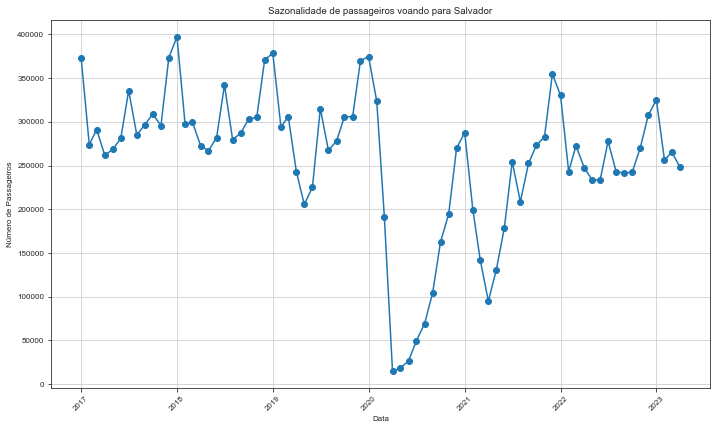

In [42]:
# filtrar os dados apenas para voos com destino a Salvador
dados_salvador = dta[dta['nome_muni_des'] == 'Salvador']

# agrupar os dados por ano e mês e somar o número de passageiros
dados_agrupados = dados_salvador.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Para facilitar a visualização, criar uma nova coluna para representar a data
dados_agrupados['data'] = pd.to_datetime(dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str))

# plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_agrupados['data'], dados_agrupados['aero_pass'], marker='o', linestyle='-')
plt.title('Sazonalidade de passageiros voando para Salvador')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

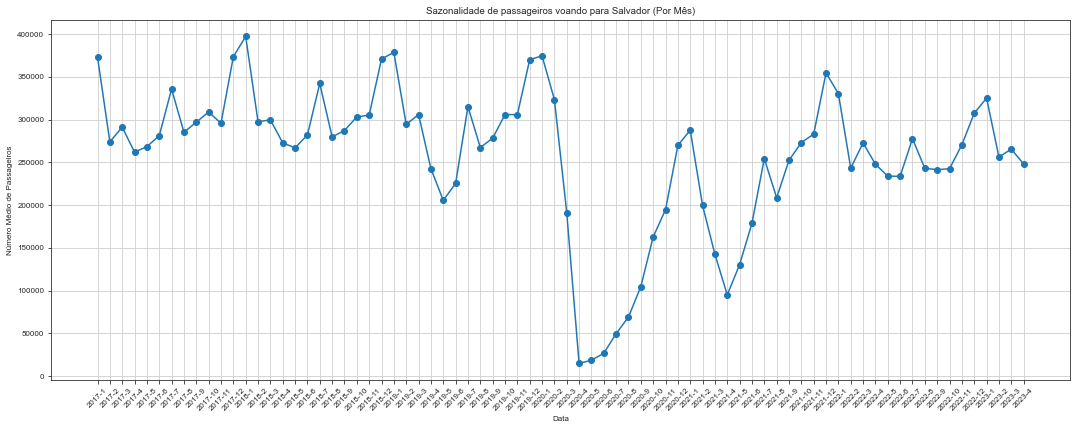

In [47]:
dados_salvador = dta[dta['nome_muni_des'] == 'Salvador']

# Agora, agrupamos os dados por mês e ano e calculamos a média do número de passageiros
dados_agrupados = dados_salvador.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Agora, vamos plotar o gráfico
plt.figure(figsize=(15, 6))
plt.plot(dados_agrupados.index, dados_agrupados['aero_pass'], marker='o', linestyle='-')
plt.title('Sazonalidade de passageiros voando para Salvador (Por Mês)')
plt.xlabel('Data')
plt.ylabel('Número Médio de Passageiros')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

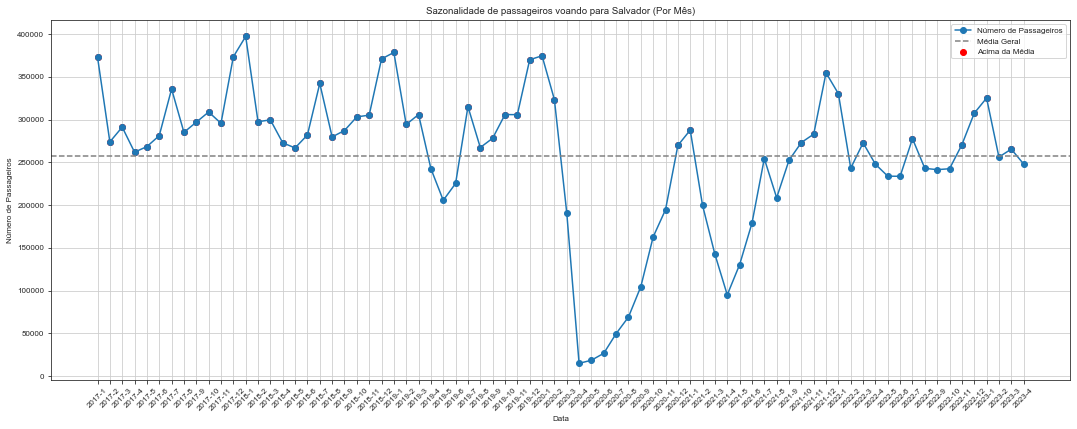

In [55]:
dados_salvador = dta[dta['nome_muni_des'] == 'Salvador']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_salvador.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média geral do número de passageiros
media_geral = dados_agrupados['aero_pass'].mean()

# Identificar os meses em que a soma de passageiros está acima da média
meses_acima_da_media = dados_agrupados[dados_agrupados['aero_pass'] > media_geral]

# Agora, vamos plotar o gráfico
plt.figure(figsize=(15, 6))
plt.plot(dados_agrupados.index, dados_agrupados['aero_pass'], marker='o', linestyle='-', label='Número de Passageiros')

# Destacar os meses acima da média
plt.scatter(meses_acima_da_media.index, meses_acima_da_media['aero_pass'], color='red', label='Acima da Média')

# Plotar a média geral
plt.axhline(y=media_geral, color='gray', linestyle='--', label='Média Geral')

# Exibir a média e o número de passageiros em cada mês
# for mes, passageiros in zip(dados_agrupados.index, dados_agrupados['aero_pass']):
#     plt.text(mes, passageiros, f'{int(passageiros)}', ha='center', va='bottom')

plt.title('Sazonalidade de passageiros voando para Salvador (Por Mês)')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

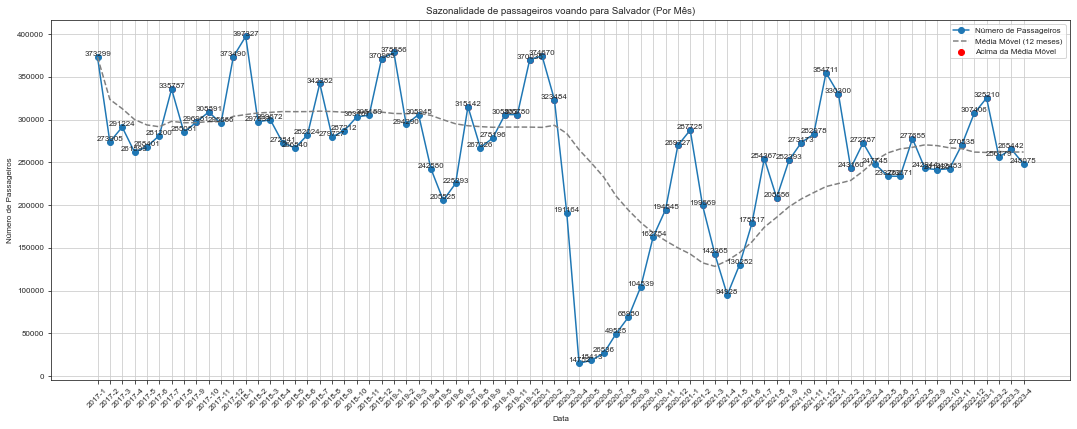

In [57]:
dados_salvador = dta[dta['nome_muni_des'] == 'Salvador']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_salvador.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média móvel com janela de 12 meses
media_movel = dados_agrupados['aero_pass'].rolling(window=12, min_periods=1).mean()

# Identificar os meses em que a soma de passageiros está acima da média móvel
meses_acima_da_media_movel = dados_agrupados[dados_agrupados['aero_pass'] > media_movel]

# Agora, vamos plotar o gráfico
plt.figure(figsize=(15, 6))

# Plotar todos os meses
plt.plot(dados_agrupados.index, dados_agrupados['aero_pass'], marker='o', linestyle='-', label='Número de Passageiros')

# Destacar os meses acima da média móvel
plt.scatter(meses_acima_da_media_movel.index, meses_acima_da_media_movel['aero_pass'], color='red', label='Acima da Média Móvel')

# Plotar a média móvel
plt.plot(dados_agrupados.index, media_movel, color='gray', linestyle='--', label='Média Móvel (12 meses)')

# Exibir o número de passageiros em cada mês
for mes, passageiros in zip(dados_agrupados.index, dados_agrupados['aero_pass']):
    plt.text(mes, passageiros, f'{int(passageiros)}', ha='center', va='bottom')

plt.title('Sazonalidade de passageiros voando para Salvador (Por Mês)')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

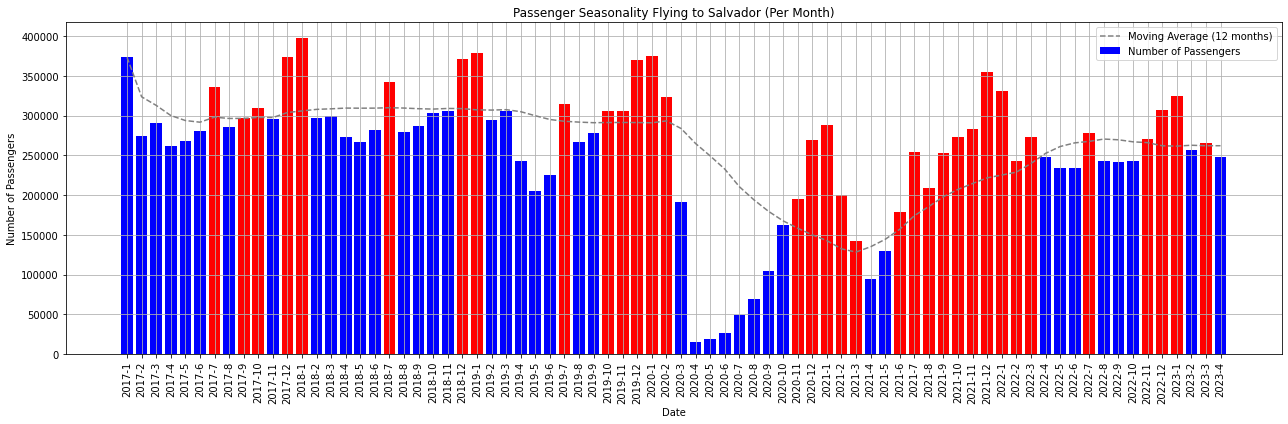

In [19]:
dados_salvador = dta[dta['nome_muni_des'] == 'Salvador']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_salvador.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média móvel com janela de 12 meses
media_movel = dados_agrupados['aero_pass'].rolling(window=12, min_periods=1).mean()

# Identificar os meses em que a soma de passageiros está acima da média móvel
meses_acima_da_media_movel = dados_agrupados[dados_agrupados['aero_pass'] > media_movel]['aero_pass']

# Criar uma lista de cores para as barras, destacando em vermelho os meses acima da média móvel
cores = ['red' if mes in meses_acima_da_media_movel else 'blue' for mes in dados_agrupados.index]

# Agora, vamos plotar o gráfico de barras
plt.figure(figsize=(18, 6))

# Plotar todas as barras
plt.bar(dados_agrupados.index, dados_agrupados['aero_pass'], color=cores, label='Number of Passengers')

# Plotar a média móvel
plt.plot(dados_agrupados.index, media_movel, color='gray', linestyle='--', label='Moving Average (12 months)')

plt.title('Passenger Seasonality Flying to Salvador (Per Month)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

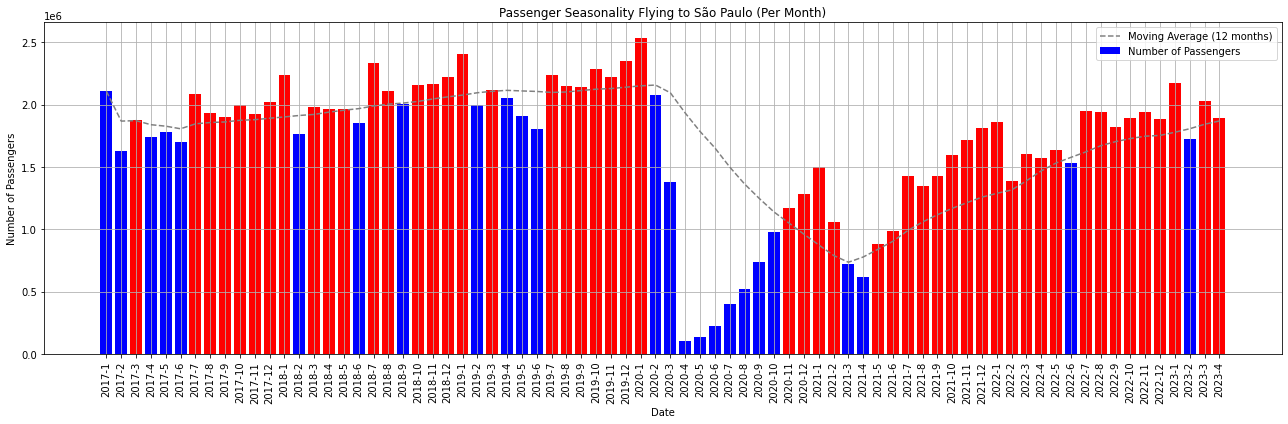

In [20]:
dados_sp = dta[dta['nome_muni_des'] == 'São Paulo']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_sp.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média móvel com janela de 12 meses
media_movel = dados_agrupados['aero_pass'].rolling(window=12, min_periods=1).mean()

# Identificar os meses em que a soma de passageiros está acima da média móvel
meses_acima_da_media_movel = dados_agrupados[dados_agrupados['aero_pass'] > media_movel]['aero_pass']

# Criar uma lista de cores para as barras, destacando em vermelho os meses acima da média móvel
cores = ['red' if mes in meses_acima_da_media_movel else 'blue' for mes in dados_agrupados.index]

# Agora, vamos plotar o gráfico de barras
plt.figure(figsize=(18, 6))

# Plotar todas as barras
plt.bar(dados_agrupados.index, dados_agrupados['aero_pass'], color=cores, label='Number of Passengers')

# Plotar a média móvel
plt.plot(dados_agrupados.index, media_movel, color='gray', linestyle='--', label='Moving Average (12 months)')

plt.title('Passenger Seasonality Flying to São Paulo (Per Month)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

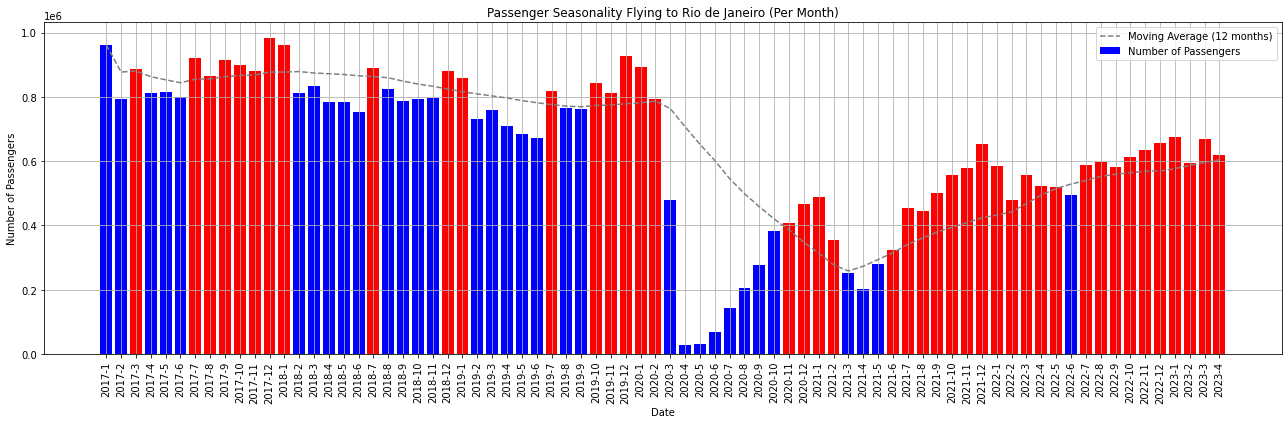

In [51]:
dados_rio = dta[dta['nome_muni_des'] == 'Rio de Janeiro']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_rio.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média móvel com janela de 12 meses
media_movel = dados_agrupados['aero_pass'].rolling(window=12, min_periods=1).mean()

# Identificar os meses em que a soma de passageiros está acima da média móvel
meses_acima_da_media_movel = dados_agrupados[dados_agrupados['aero_pass'] > media_movel]['aero_pass']

# Criar uma lista de cores para as barras, destacando em vermelho os meses acima da média móvel
cores = ['red' if mes in meses_acima_da_media_movel else 'blue' for mes in dados_agrupados.index]

# Agora, vamos plotar o gráfico de barras
plt.figure(figsize=(18, 6))

# Plotar todas as barras
plt.bar(dados_agrupados.index, dados_agrupados['aero_pass'], color=cores, label='Number of Passengers')

# Plotar a média móvel
plt.plot(dados_agrupados.index, media_movel, color='gray', linestyle='--', label='Moving Average (12 months)')

plt.title('Passenger Seasonality Flying to Rio de Janeiro (Per Month)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

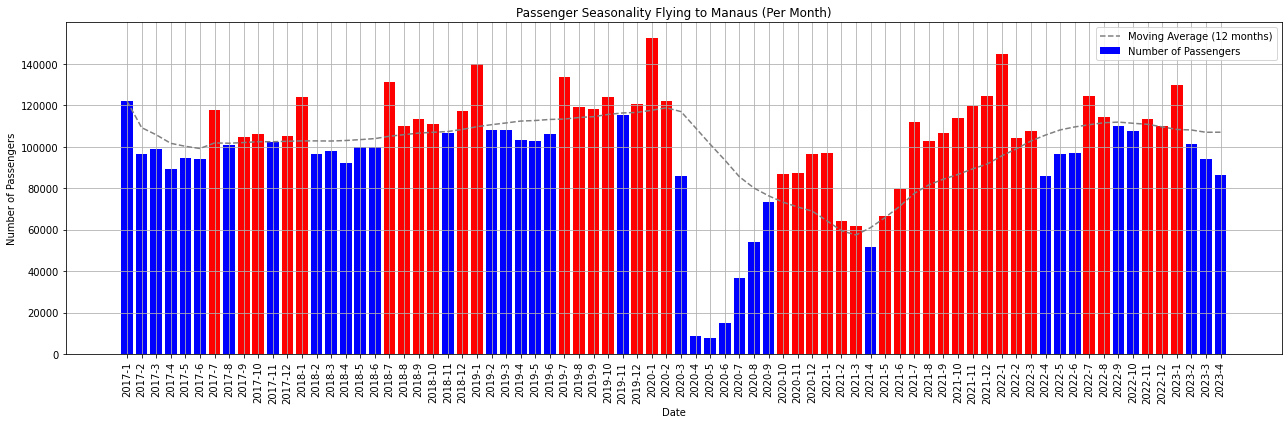

In [21]:
dados_manaus = dta[dta['nome_muni_des'] == 'Manaus']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_manaus.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média móvel com janela de 12 meses
media_movel = dados_agrupados['aero_pass'].rolling(window=12, min_periods=1).mean()

# Identificar os meses em que a soma de passageiros está acima da média móvel
meses_acima_da_media_movel = dados_agrupados[dados_agrupados['aero_pass'] > media_movel]['aero_pass']

# Criar uma lista de cores para as barras, destacando em vermelho os meses acima da média móvel
cores = ['red' if mes in meses_acima_da_media_movel else 'blue' for mes in dados_agrupados.index]

# Agora, vamos plotar o gráfico de barras
plt.figure(figsize=(18, 6))

# Plotar todas as barras
plt.bar(dados_agrupados.index, dados_agrupados['aero_pass'], color=cores, label='Number of Passengers')

# Plotar a média móvel
plt.plot(dados_agrupados.index, media_movel, color='gray', linestyle='--', label='Moving Average (12 months)')

plt.title('Passenger Seasonality Flying to Manaus (Per Month)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

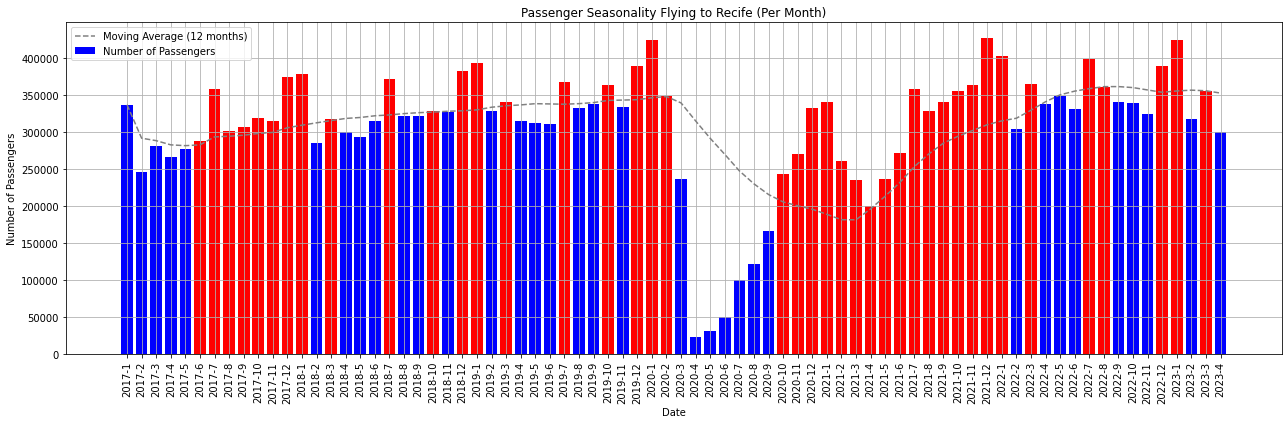

In [17]:
dados_rec = dta[dta['nome_muni_des'] == 'Recife']

# Agora, agrupamos os dados por mês e ano e calculamos a soma do número de passageiros
dados_agrupados = dados_rec.groupby(['ano', 'mes'])['aero_pass'].sum().reset_index()

# Criar uma coluna com o ano e o mês concatenados
dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str)

# Definir a coluna 'ano_mes' como índice do DataFrame
dados_agrupados.set_index('ano_mes', inplace=True)

# Calcular a média móvel com janela de 12 meses
media_movel = dados_agrupados['aero_pass'].rolling(window=12, min_periods=1).mean()

# Identificar os meses em que a soma de passageiros está acima da média móvel
meses_acima_da_media_movel = dados_agrupados[dados_agrupados['aero_pass'] > media_movel]['aero_pass']

# Criar uma lista de cores para as barras, destacando em vermelho os meses acima da média móvel
cores = ['red' if mes in meses_acima_da_media_movel else 'blue' for mes in dados_agrupados.index]

# Agora, vamos plotar o gráfico de barras
plt.figure(figsize=(18, 6))

# Plotar todas as barras
plt.bar(dados_agrupados.index, dados_agrupados['aero_pass'], color=cores, label='Number of Passengers')

# Plotar a média móvel
plt.plot(dados_agrupados.index, media_movel, color='gray', linestyle='--', label='Moving Average (12 months)')

plt.title('Passenger Seasonality Flying to Recife (Per Month)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Comparing seasonal flow differences for Salvador (Janeiro vs Maio)

In [46]:
dados_2022 = dados_salvador[dados_salvador['ano'] == '2020']

In [47]:
data_chord = dados_2022.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()
# data_chord = dados_salvador.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

dados_janeiro = data_chord[(data_chord['mes'] == 1) & (data_chord['nome_muni_des'] == 'Salvador')]
dados_maio = data_chord[(data_chord['mes'] == 5) & (data_chord['nome_muni_des'] == 'Salvador')]

# Obter os municípios únicos de "nome_muni_ori" para cada mês
municipios_janeiro = set(dados_janeiro['nome_muni_ori'])
municipios_maio = set(dados_maio['nome_muni_ori'])

# Calcular a diferença entre os municípios de janeiro e maio
diferenca_alta = municipios_janeiro - municipios_maio
diferenca_baixa = municipios_maio - municipios_janeiro

# Exibir a diferença
print("Municípios que viajaram para Salvador em janeiro, mas não em maio:")
print(diferenca_alta)
print("Municípios que viajaram para Salvador em maio, mas não em janeiro:")
print(diferenca_baixa)

Municípios que viajaram para Salvador em janeiro, mas não em maio:
{'Petrolina', 'Lençóis', 'Ilhéus', 'São Gonçalo do Amarante', 'Barreiras', 'Vitória da Conquista', 'Porto Alegre', 'Teixeira de Freitas', 'Santa Rita', 'São José dos Pinhais', 'Porto Seguro', 'Vitória', 'Goiânia', 'Ribeirão Preto', 'Foz do Iguaçu'}
Municípios que viajaram para Salvador em maio, mas não em janeiro:
{'Navegantes'}


In [33]:
dados_2022

,ano,mes,nat,nome_muni_ori,uf_ori,nome_muni_des,uf_des,co_muni_ori,co_muni_des,aero_pass,co_uf_ori,co_uf_des,aero_pass_week,aero_conec


In [143]:
months = [5]
data_chord_filtered = data_chord[data_chord['mes'].isin(months)]
data_chord = data_chord_filtered.rename(columns={"nome_muni_ori":"source", "nome_muni_des":"target", "aero_pass":"weight"})
data_chord.head()

# Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Load example data
df1 = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

#data_chord[(data_chord.target != 'SP') & (data_chord.source != 'SP')]
#[data_chord.ano == '2019'][['source','target','weight']] 

# Plot
d3.chord(df1)

# Or specify the output path
d3.chord(df1, filepath='/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/images/chord_salvador_maio.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Convert to DataFrame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> File not found: [file:////var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: file:////var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing 

## Comparing seasonal flow differences for Manaus (julho vs abril)

In [49]:
dados_2022 = dados_manaus[dados_manaus['ano'] == '2022']
data_chord = dados_2022.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

# data_chord = dados_manaus.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

dados_july = data_chord[(data_chord['mes'] == 7) & (data_chord['nome_muni_des'] == 'Manaus')]
dados_april = data_chord[(data_chord['mes'] == 4) & (data_chord['nome_muni_des'] == 'Manaus')]

# Obter os municípios únicos de "nome_muni_ori" para cada mês
municipios_july = set(dados_july['nome_muni_ori'])
municipios_april = set(dados_april['nome_muni_ori'])

# Calcular a diferença entre os municípios de janeiro e maio
diferenca_alta = municipios_july - municipios_april 
diferenca_baixa = municipios_april - municipios_july

# Exibir a diferença
print("Municípios que viajaram para Manaus em Julho, mas não em abril:")
print(diferenca_alta)
# Exibir a diferença
print("Municípios que viajaram para Manaus em abril, mas não em julho:")
print(diferenca_baixa)

Municípios que viajaram para Manaus em Julho, mas não em abril:
{'Rio Largo', 'Campo Grande', 'Alta Floresta', 'Porto Seguro', 'Barcelos'}
Municípios que viajaram para Manaus em abril, mas não em julho:
{'São José dos Pinhais'}


In [149]:
months = [4]
data_chord_filtered = data_chord[data_chord['mes'].isin(months)]
data_chord = data_chord_filtered.rename(columns={"nome_muni_ori":"source", "nome_muni_des":"target", "aero_pass":"weight"})
data_chord.head()

# Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Load example data
df1 = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

#data_chord[(data_chord.target != 'SP') & (data_chord.source != 'SP')]
#[data_chord.ano == '2019'][['source','target','weight']] 

# Plot
d3.chord(df1)

# Or specify the output path
d3.chord(df1, filepath='/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/images/chord_manaus_abril.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Convert to DataFrame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> File not found: [file:////var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: file:////var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing 

## Comparing seasonal flow differences for Rio (dezembro vs junho)

In [53]:
dados_2022 = dados_rio[dados_rio['ano'] == '2022']
data_chord = dados_2022.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

dados_dec = data_chord[(data_chord['mes'] == 12) & (data_chord['nome_muni_des'] == 'Rio de Janeiro')]
dados_jun = data_chord[(data_chord['mes'] == 6) & (data_chord['nome_muni_des'] == 'Rio de Janeiro')]

# Obter os municípios únicos de "nome_muni_ori" para cada mês
municipios_dec = set(dados_dec['nome_muni_ori'])
municipios_jun = set(dados_jun['nome_muni_ori'])

# Calcular a diferença entre os municípios de janeiro e maio
diferenca_alta = municipios_dec - municipios_jun
diferenca_baixa = municipios_jun - municipios_dec

# Exibir a diferença
print("Municípios que viajaram para Rio em dezembro, mas não em junho:")
print(diferenca_alta)
print("Municípios que viajaram para Rio em junho, mas não em dezembro:")
print(diferenca_baixa)

Municípios que viajaram para Rio em dezembro, mas não em junho:
{'São José dos Campos', 'Petrolina', 'Caxias do Sul', 'Jundiaí', 'Ilhéus', 'Porto Velho'}
Municípios que viajaram para Rio em junho, mas não em dezembro:
set()


In [159]:
# months = [12]
months = [12]
data_chord_filtered = data_chord[data_chord['mes'].isin(months)]
data_chord = data_chord_filtered.rename(columns={"nome_muni_ori":"source", "nome_muni_des":"target", "aero_pass":"weight"})
data_chord.head()

# Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Load example data
df1 = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

#data_chord[(data_chord.target != 'SP') & (data_chord.source != 'SP')]
#[data_chord.ano == '2019'][['source','target','weight']] 

# Plot
d3.chord(df1)

# Or specify the output path
d3.chord(df1, filepath='/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/images/rio_dec.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Convert to DataFrame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> File not found: [file:////var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: file:////var/folders/39/b3k7r4zx4s11s8clnsq5mm3c0000gn/T/d3blocks/chord.html
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing 

## Comparing seasonal flow differences for SP (Janeiro vs junho)

In [58]:
#verified for Jan, feb and jun. No diferences in the flow were identified for SP
dados_2022 = dados_sp[dados_sp['ano'] == '2022']
data_chord = dados_2022.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

dados_jan = data_chord[(data_chord['mes'] == 1) & (data_chord['nome_muni_des'] == 'Rio de Janeiro')]
dados_jun = data_chord[(data_chord['mes'] == 6) & (data_chord['nome_muni_des'] == 'Rio de Janeiro')]

# Obter os municípios únicos de "nome_muni_ori" para cada mês
municipios_jan = set(dados_jan['nome_muni_ori'])
municipios_jun = set(dados_jun['nome_muni_ori'])

# Calcular a diferença entre os municípios de janeiro e maio
diferenca_alta = municipios_jan - municipios_jun
diferenca_baixa = municipios_jun - municipios_jan

# Exibir a diferença
print("Municípios que viajaram para SP em janeiro, mas não em junho:")
print(diferenca_alta)
print("Municípios que viajaram para SP em jun, mas não em janeiro:")
print(diferenca_baixa)

Municípios que viajaram para SP em janeiro, mas não em junho:
set()
Municípios que viajaram para SP em jun, mas não em janeiro:
set()


## Comparing seasonal flow differences for Recife (Janeiro vs abril)

In [64]:
dados_2022 = dados_rec[dados_rec['ano'] == '2021']
data_chord = dados_2022.groupby(['ano','mes','nome_muni_ori', 'nome_muni_des'])['aero_pass'].sum().reset_index()

dados_jan = data_chord[(data_chord['mes'] == 1) & (data_chord['nome_muni_des'] == 'Rio de Janeiro')]
dados_ab = data_chord[(data_chord['mes'] == 4) & (data_chord['nome_muni_des'] == 'Rio de Janeiro')]

# Obter os municípios únicos de "nome_muni_ori" para cada mês
municipios_jan = set(dados_jan['nome_muni_ori'])
municipios_ab = set(dados_ab['nome_muni_ori'])

# Calcular a diferença entre os municípios de janeiro e maio
diferenca_alta = municipios_jan - municipios_ab
diferenca_baixa = municipios_ab - municipios_jan

# Exibir a diferença
print("Municípios que viajaram para Recife em janeiro, mas não em abril:")
print(diferenca_alta)
print("Municípios que viajaram para Recife em abril, mas não em janeiro:")
print(diferenca_baixa)

Municípios que viajaram para Recife em janeiro, mas não em abril:
set()
Municípios que viajaram para Recife em abril, mas não em janeiro:
set()


In [61]:
dados_2022

,ano,mes,nat,nome_muni_ori,uf_ori,nome_muni_des,uf_des,co_muni_ori,co_muni_des,aero_pass,co_uf_ori,co_uf_des,aero_pass_week,aero_conec
61273,2021,1,DOMÉSTICA,Aracaju,SE,Recife,PE,2800308,2611606,5964,28,28,1491.00,59.64
61317,2021,1,DOMÉSTICA,Belo Horizonte,MG,Recife,PE,3106200,2611606,14787,31,31,3696.75,147.87
61354,2021,1,DOMÉSTICA,Belém,PA,Recife,PE,1501402,2611606,7582,15,15,1895.50,75.82
61394,2021,1,DOMÉSTICA,Brasília,DF,Recife,PE,5300108,2611606,30301,53,53,7575.25,303.01
61423,2021,1,DOMÉSTICA,Campina Grande,PB,Recife,PE,2504009,2611606,4282,25,25,1070.50,42.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74272,2021,9,DOMÉSTICA,São Paulo,SP,Recife,PE,3550308,2611606,97300,35,35,24325.00,973.00
74301,2021,9,DOMÉSTICA,Teresina,PI,Recife,PE,2211001,2611606,7044,22,22,1761.00,70.44
74309,2021,9,DOMÉSTICA,Uberlândia,MG,Recife,PE,3170206,2611606,689,31,31,172.25,6.89
74324,2021,9,DOMÉSTICA,Vitória,ES,Recife,PE,3205309,2611606,2697,32,32,674.25,26.97
